In [1]:
#Importing required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Reading the CSV file
vardata=pd.read_csv('data_2_var.csv',names = ['X', 'Y'])

In [3]:
pd.set_option("display.max_columns", None)
vardata.head()

,X,Y
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
vardata.shape

(1111, 2)

In [5]:
vardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1111 non-null   float64
 1   Y       1111 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [6]:
vardata.isna().sum()

X    0
Y    0
dtype: int64

In [7]:
#Positive values in both the columns
vardata[(vardata[['X','Y']] > 0).all(1)]

,X,Y
300,82.896050,1.467981
306,84.633331,7.000000
307,84.775244,8.755985
309,72.041717,11.947285
310,89.633331,18.000000
...,...,...
1067,134.605775,123.619680
1068,116.633331,118.000000
1069,115.862302,118.564590
1070,117.366199,99.544820


In [8]:
#Negative values in both the columns
vardata[(vardata[['X','Y']] < 0).all(1)]

,X,Y
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
925,-4.718673,-80.064621
926,-9.311160,-104.488303
930,-3.712000,-78.951450
937,-6.995212,-81.878729


In [9]:
#Finding unique values in X column
vardata['X'].unique()

array([-1.22740667e+02, -1.21531419e+02, -1.34917019e+02, -1.20605951e+02,
       -1.29894781e+02, -1.34366669e+02, -1.15563739e+02, -1.32080161e+02,
       -1.33366669e+02, -1.19524112e+02, -1.25743622e+02, -1.14100895e+02,
       -1.31366669e+02, -1.13278338e+02, -1.33818175e+02, -1.21653543e+02,
       -1.27366669e+02, -1.08499640e+02, -1.11253677e+02, -1.24366669e+02,
       -1.19116602e+02, -1.14410526e+02, -1.22366669e+02, -1.31905360e+02,
       -1.09278368e+02, -1.05504641e+02, -1.12257907e+02, -1.11044048e+02,
       -1.26637640e+02, -1.20366669e+02, -1.25085620e+02, -1.03409788e+02,
       -1.15262637e+02, -1.19366669e+02, -1.04906529e+02, -9.97125535e+01,
       -1.17366669e+02, -1.16332839e+02, -1.25382159e+02, -1.03219985e+02,
       -1.15366669e+02, -1.20275093e+02, -1.13257481e+02, -9.66983513e+01,
       -1.01997441e+02, -1.11902602e+02, -1.30789929e+02, -1.12366669e+02,
       -9.89477182e+01, -1.04681987e+02, -1.12866909e+02, -1.10366669e+02,
       -1.08604445e+02, -

In [10]:
#Describing statistic values of dataset
vardata.describe()

,X,Y
count,1111.000000,1111.000000
mean,6.783026,-26.187358
std,79.383668,69.794973
min,-134.962839,-132.422167
25%,-53.521987,-77.000000
50%,15.737782,-46.072638
75%,76.134647,7.435231
max,134.605775,134.425495


In [11]:
#To find the median
vardata.median()

X    15.737782
Y   -46.072638
dtype: float64

In [12]:
#mode is used for the number which repeated highest number of times
vardata.mode()

,X,Y
0,-125.366669,-95.0


In [13]:
######Finding outliers using IQR method#####
def outliers_iqr(vardata,col):    
    q1 = vardata[col].quantile(0.25)
    q3 = vardata[col].quantile(0.75)
    iqr = q3 - q1

    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    outliers = []
    for val in vardata[col]:
        if val < lb or val > ub:
            outliers.append(val)

    return outliers,len(outliers)

In [14]:
outliers_iqr(vardata, 'X')

([], 0)

In [15]:
outliers_iqr(vardata, 'Y')

([134.42549519999997], 1)

In [16]:
#here there is one outlier in Y column and it is at right side to the mean and median<mean so we have positive skewness
print(vardata['Y'].skew())

0.9078899958067838


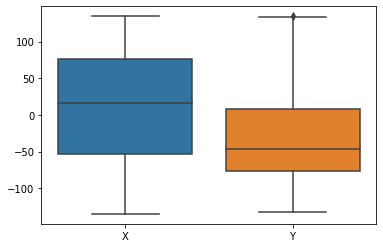

In [17]:
#vardata.boxplot()
sns.boxplot(data=vardata)

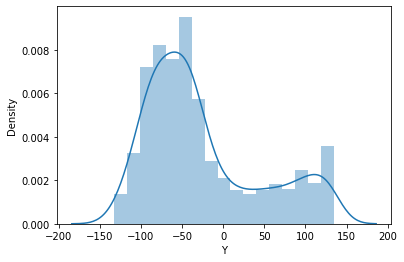

In [18]:
sns.distplot((vardata.Y));

In [42]:
from sklearn.preprocessing import StandardScaler

# obj = StandardScaler()
# obj.function

standardized_data = StandardScaler().fit_transform(vardata)

In [43]:
standardized_data

array([[-1.63235119, -1.49626443],
       [-1.61711137, -1.48718869],
       [-1.78580637, -1.49009713],
       ...,
       [-1.47105508,  2.19863725],
       [-1.49088186,  2.2125914 ],
       [-1.47612222,  2.13973194]])

In [45]:
df1=pd.DataFrame(standardized_data,columns =['X1', 'Y1'])

In [46]:
df1

,X1,Y1
0,-1.632351,-1.496264
1,-1.617111,-1.487189
2,-1.785806,-1.490097
3,-1.605448,-1.427301
4,-1.722512,-1.241305
...,...,...
1106,-1.539419,2.109803
1107,-1.597235,2.147202
1108,-1.471055,2.198637
1109,-1.490882,2.212591


In [47]:
#Input and output dataset
X1=df1.drop(['Y1'],axis=1)
Y1=df1['Y1']
display(X1) 

,X1
0,-1.632351
1,-1.617111
2,-1.785806
3,-1.605448
4,-1.722512
...,...
1106,-1.539419
1107,-1.597235
1108,-1.471055
1109,-1.490882


In [48]:
#To import train_test_split function,i used scikit learn model selection as module, beacuse in this module only
#the train_test_split function is available
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,train_size=0.75,random_state=0)

In [50]:
print(X_train.shape)

(833, 1)


In [51]:
print(X_test.shape)

(278, 1)


In [52]:
print(Y_test.shape)

(278,)


In [53]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_pred=reg.predict(X_test)

In [61]:
pd.DataFrame({'True y':Y_test,'Predicted y':y_pred})

,True y,Predicted y
900,-0.986369,0.076790
546,0.345495,0.416996
186,-0.613682,-0.141068
847,-1.353510,-0.648190
418,0.727341,0.381577
...,...,...
667,-0.871696,-0.092050
1104,2.192903,-0.677971
713,-0.349760,-0.230641
264,-0.252899,0.151614


In [56]:
from sklearn import metrics
metrics.mean_squared_error(Y_test,y_pred)

0.8304513756977445

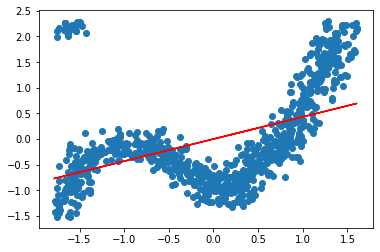

In [65]:

plt.scatter(X_train, Y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()